<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-13 16:22:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.7MB/s    in 3.4s    

2025-08-13 16:22:08 (59.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 192.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 194.7 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.4 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [16]:
# Re-establish the connection if it was closed
#conn = sqlite3.connect('survey-data.sqlite')

# Define the query
query = """select CompTotal from main;"""
df_comp_total = pd.read_sql_query(query, conn)
print(df_comp_total.isna().sum())
print(df_comp_total.notna().sum())

CompTotal    31697
dtype: int64
CompTotal    33740
dtype: int64


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


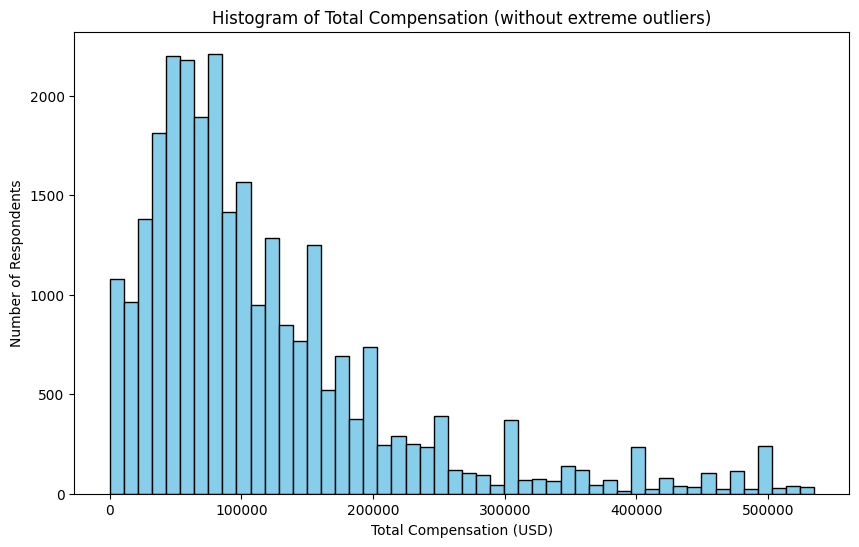

Number of extreme outliers: 5876
Extreme outlier values: [2040000. 1140000. 1200000. ...  728000.  775000. 3087958.]


In [22]:
## Write your code here
query = """select CompTotal from main where CompTotal is not null;"""
df_comp_total = pd.read_sql_query(query, conn)

# Drop any remaining NaN values (just in case)
df_comp_total = df_comp_total.dropna()

# Calculate basic statistics for detecting extreme outliers
Q1 = df_comp_total['CompTotal'].quantile(0.25)
Q3 = df_comp_total['CompTotal'].quantile(0.75)
IQR = Q3 - Q1 # Interquartile range

# Define upper bound for "normal" values
upper_bound = Q3 + 1.5 * IQR

# Filter valid (non-extreme) compensation data
comp_total_valid = df_comp_total[df_comp_total['CompTotal'] <= upper_bound]

# Separate extreme outliers
comp_total_anomalies = df_comp_total[df_comp_total['CompTotal'] > upper_bound]

# Plot histogram for valid compensation data
plt.figure(figsize=(10,6))
plt.hist(comp_total_valid['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (without extreme outliers)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.show()

# Print information about extreme outliers
print("Number of extreme outliers:", len(comp_total_anomalies))
print("Extreme outlier values:", comp_total_anomalies['CompTotal'].unique())

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


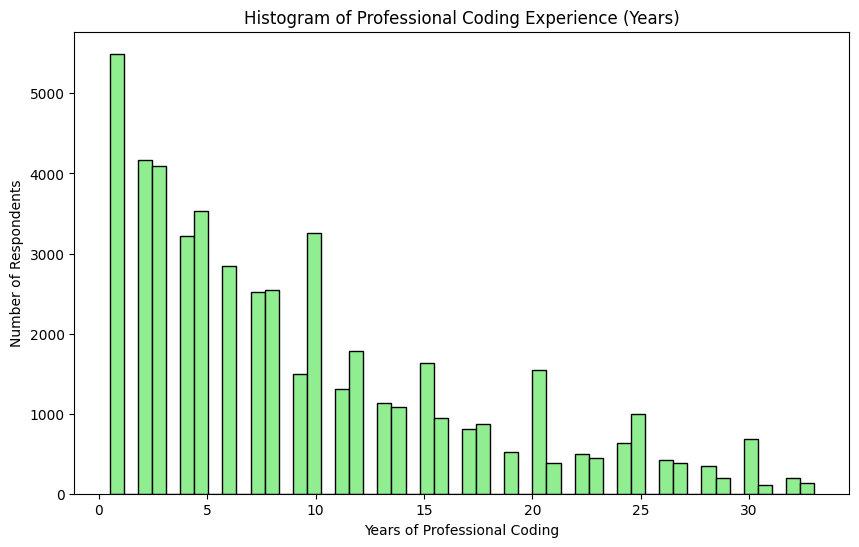

Number of extreme outliers: 1420
Extreme outlier values: [37. 45. 35. 34. 40. 50. 39. 44. 42. 41. 36. 38. 43. 47. 48. 46. 49.]


In [34]:
## Write your code here
query = """select YearsCodePro from main;"""
years_code_pro_df = pd.read_sql_query(query, conn)

#years_code_pro_df['YearsCodePro'].unique()

# Mapping special string values to numeric
mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 50
}

# Create a new numeric column
years_code_pro_df['YearsCodePro_num'] = years_code_pro_df['YearsCodePro'].map(mapping)  # map special strings
years_code_pro_df['YearsCodePro_num'] = years_code_pro_df['YearsCodePro_num'].fillna(years_code_pro_df['YearsCodePro'])  # keep numeric strings

# Convert all values to float
years_code_pro_df['YearsCodePro_num'] = years_code_pro_df['YearsCodePro_num'].astype(float)

# Drop NaN values
df_clean = years_code_pro_df.dropna(subset=['YearsCodePro_num'])

# Calculate IQR to find extreme outliers
Q1 = df_clean['YearsCodePro_num'].quantile(0.25)
Q3 = df_clean['YearsCodePro_num'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound for normal values
upper_bound = Q3 + 1.5 * IQR

# Separate valid data and extreme outliers
years_valid = df_clean[df_clean['YearsCodePro_num'] <= upper_bound]
years_anomalies = df_clean[df_clean['YearsCodePro_num'] > upper_bound]

# Plot histogram for valid coding experience
plt.figure(figsize=(10,6))
plt.hist(years_valid['YearsCodePro_num'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Professional Coding Experience (Years)')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Number of Respondents')
plt.show()

# Output info about extreme outliers
print("Number of extreme outliers:", len(years_anomalies))
print("Extreme outlier values:", years_anomalies['YearsCodePro_num'].unique())

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


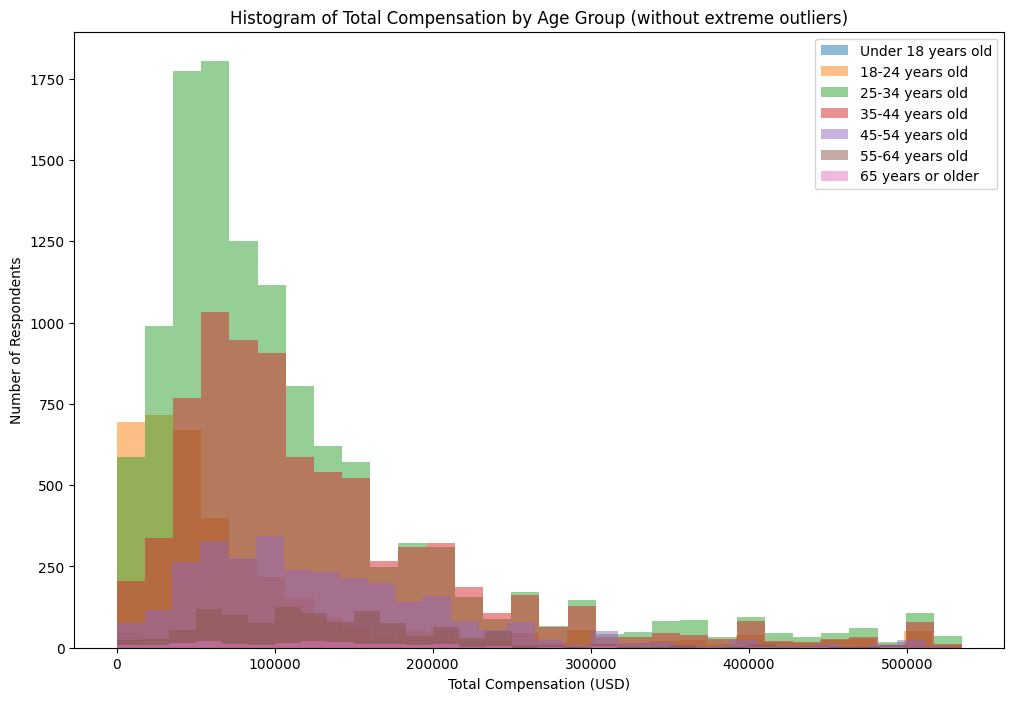

Number of extreme outliers: 5876
Extreme outlier values: [2040000. 1140000. 1200000. ...  728000.  775000. 3087958.]


In [40]:
## Write your code here

# Load CompTotal and Age
query = """select CompTotal, Age from main;"""
total_comp_by_age_df = pd.read_sql_query(query, conn)

# Drop NaN in Age just in case
total_comp_by_age_df = total_comp_by_age_df.dropna(subset='Age')

# Map Age groups to numeric values (average age of each group)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
total_comp_by_age_df['Age_num'] = total_comp_by_age_df['Age'].map(age_mapping)

# Filter out extreme CompTotal values using IQR
Q1 = total_comp_by_age_df['CompTotal'].quantile(0.25)
Q3 = total_comp_by_age_df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound for normal values
upper_bound = Q3 + 1.5 * IQR

# Separate valid and extreme values
df_valid = total_comp_by_age_df[total_comp_by_age_df['CompTotal'] <= upper_bound]
df_anomalies = total_comp_by_age_df[total_comp_by_age_df['CompTotal'] > upper_bound]

# Plot histograms for each Age group
plt.figure(figsize=(12,8))

# Define ordered list of Age groups for plotting
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

for age_label in age_order:
    subset = df_valid[df_valid['Age'] == age_label]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=age_label)

plt.title('Histogram of Total Compensation by Age Group (without extreme outliers)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.legend()
plt.show()

# Output info about extreme outliers
print("Number of extreme outliers:", len(df_anomalies))
print("Extreme outlier values:", df_anomalies['CompTotal'].unique())

# print(f'Null vals: {total_comp_by_age_df['Age'].isna().sum()}')
# print(f'Not Null vals: {total_comp_by_age_df['Age'].notna().sum()}')
# print(f'Unique vals: {total_comp_by_age_df['Age'].unique()}')

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


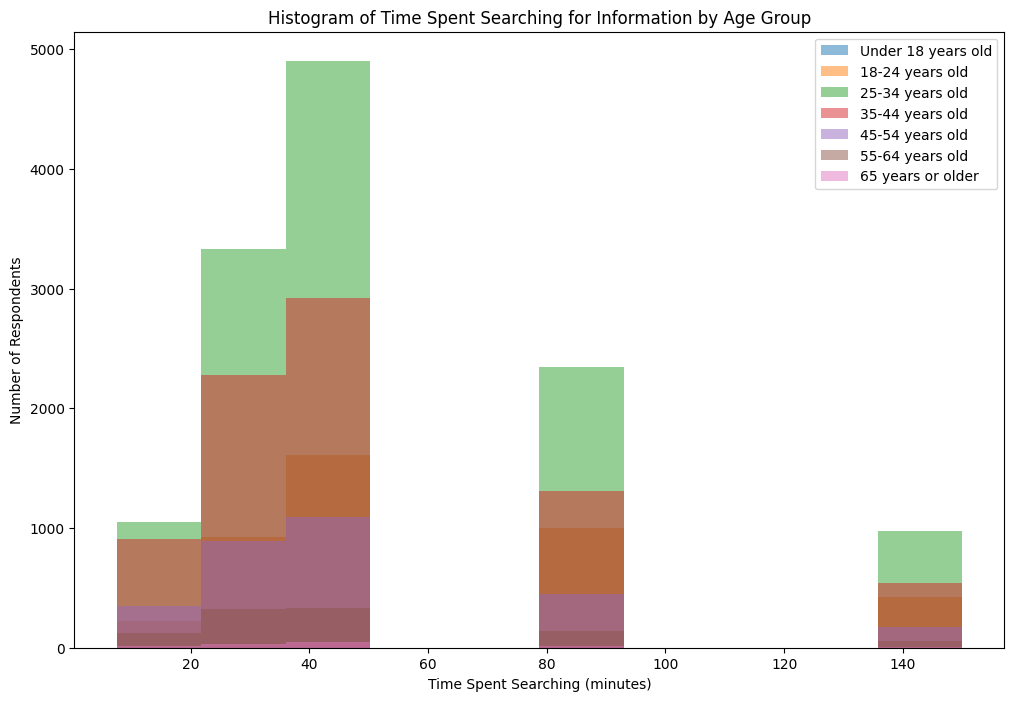

In [16]:
## Write your code here

# Load TimeSearching and Age columns
query = """select TimeSearching, Age from main"""
time_searching_df = pd.read_sql_query(query, conn)

# Drop NaN in TimeSearching and Age
time_searching_df = time_searching_df.dropna(subset=['TimeSearching', 'Age'])

# Map Age groups to numeric values (average age)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
time_searching_df['Age_num'] = time_searching_df['Age'].map(age_mapping)

# Drop 'Prefer not to say' values
time_searching_df = time_searching_df.dropna(subset=['Age_num'])

# Map TimeSearching categories to numeric minutes
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
time_searching_df['TimeSearching_min'] = time_searching_df['TimeSearching'].map(time_mapping)

# Drop any rows that could not be mapped (just in case)
time_searching_df = time_searching_df.dropna(subset=['TimeSearching_min'])

# Define ordered list of Age groups for plotting
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

# Plot histograms for each Age group
plt.figure(figsize=(12,8))

for age_label in age_order:
    subset = time_searching_df[time_searching_df['Age'] == age_label]
    plt.hist(subset['TimeSearching_min'], bins=10, alpha=0.5, label=age_label)

plt.title('Histogram of Time Spent Searching for Information by Age Group')
plt.xlabel('Time Spent Searching (minutes)')
plt.ylabel('Number of Respondents')
plt.legend()
plt.show()

# print(f'Null values: {time_searching_df.isna().sum()}\n')
# print(f'Not Null values: {time_searching_df['TimeSearching'].notna().sum()}\n')
# print(f'Unique values: {time_searching_df['TimeSearching'].unique()}')

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


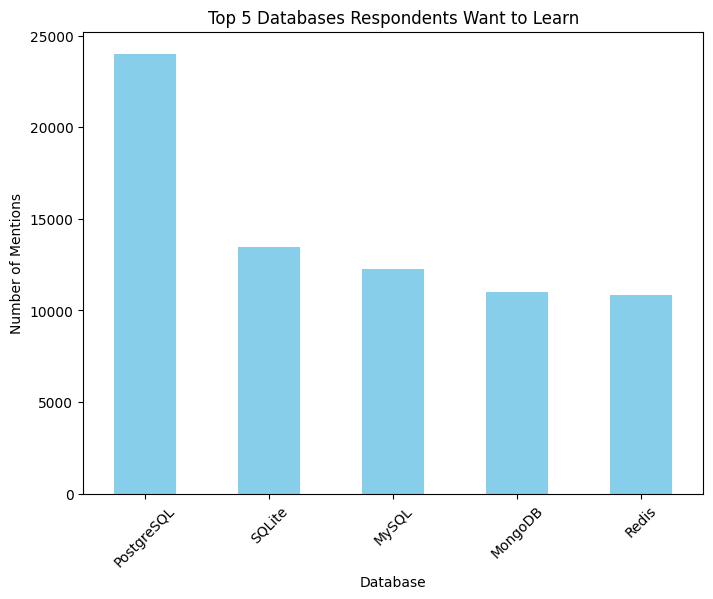

In [28]:
## Write your code here

# Load column DatabaseWantToWorkWith
query = """select DatabaseWantToWorkWith from main;"""
database_want_df = pd.read_sql_query(query, conn)

# Drop NaN
database_want_df = database_want_df.dropna(subset=['DatabaseWantToWorkWith'])

# Split multiple databases and explode into separate rows
database_want_df['DatabaseWantToWorkWith'] = database_want_df['DatabaseWantToWorkWith'].str.split(';')
database_want_exploded = database_want_df.explode('DatabaseWantToWorkWith')

# Count occurrences of each database
db_counts = database_want_exploded['DatabaseWantToWorkWith'].value_counts()

# Take top 5 most desired databases
top5_db = db_counts.head(5)

# Plot histogram
plt.figure(figsize=(8,6))
top5_db.plot(kind='bar', color='skyblue')
plt.title('Top 5 Databases Respondents Want to Learn')
plt.ylabel('Number of Mentions')
plt.xlabel('Database')
plt.xticks(rotation=45)
plt.show()

# print(f'Missing (Null) values count: {database_want_Work_df.isna().sum()}\n')
# print(f'Not Null values count: {database_want_Work_df['DatabaseWantToWorkWith'].notnull().sum()}\n')
# print(f'Unique values count: {database_want_Work_df['DatabaseWantToWorkWith'].nunique()}\n')
# print(f'Unique values: {database_want_Work_df['DatabaseWantToWorkWith'].unique()}')
# database_want_Work_df['DatabaseWantToWorkWith'].head(100)

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


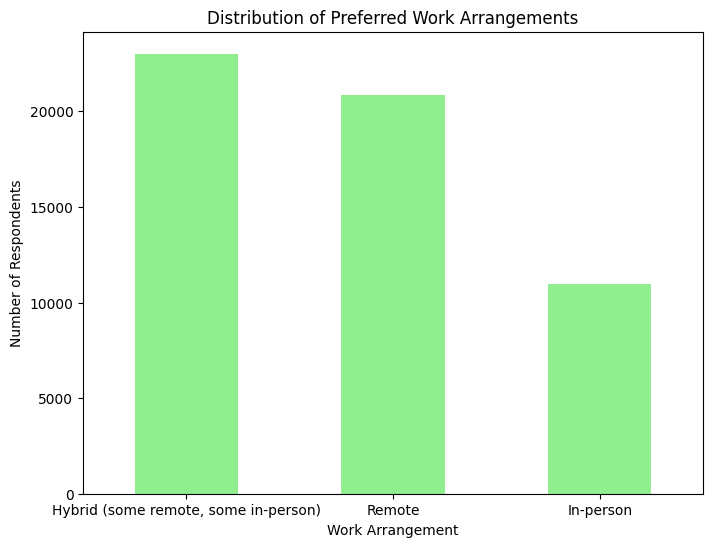

In [32]:
## Write your code here

# Load RemoteWork column
query = """select RemoteWork from main"""
remote_work_df = pd.read_sql_query(query, conn)

# Drop NaN values
remote_work_df = remote_work_df.dropna(subset=['RemoteWork'])

# Count occurrences of each category
remote_counts = remote_work_df['RemoteWork'].value_counts()

# Plot histogram (bar chart)
plt.figure(figsize=(8,6))
remote_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Preferred Work Arrangements')
plt.ylabel('Number of Respondents')
plt.xlabel('Work Arrangement')
plt.xticks(rotation=0)
plt.show()

# print(f'Missing (Null) values count: {remote_work_df.isna().sum()}\n')
# print(f'Not Null values count: {remote_work_df['RemoteWork'].notnull().sum()}\n')
# print(f'Unique values count: {remote_work_df['RemoteWork'].nunique()}\n')
# print(f'Unique values: {remote_work_df['RemoteWork'].unique()}')

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


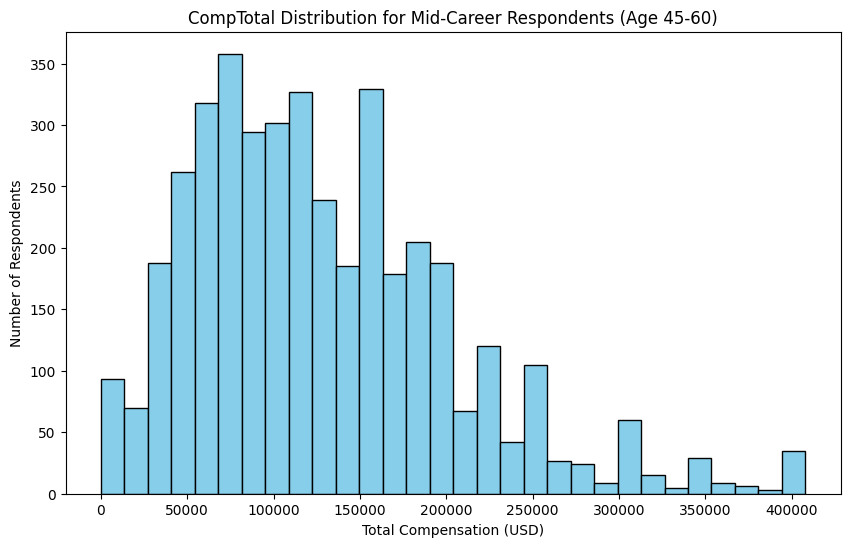

In [36]:
## Write your code here
query = """select CompTotal, Age from main;"""
total_comp_by_age = pd.read_sql_query(query, conn)

# Load CompTotal and Age
query = """SELECT CompTotal, Age FROM main;"""
total_comp_by_age = pd.read_sql_query(query, conn)

# Drop rows with missing Age or CompTotal
total_comp_by_age = total_comp_by_age.dropna(subset=['Age', 'CompTotal'])

# Map Age groups to numeric values (average age)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
total_comp_by_age['Age_num'] = total_comp_by_age['Age'].map(age_mapping)

# Drop 'Prefer not to say'
total_comp_by_age = total_comp_by_age.dropna(subset=['Age_num'])

# Filter Age 45–60 (mid-career)
mid_career_df = total_comp_by_age[
    (total_comp_by_age['Age_num'] >= 45) &
    (total_comp_by_age['Age_num'] <= 60)
]

# Filter extreme CompTotal values using IQR
Q1 = mid_career_df['CompTotal'].quantile(0.25)
Q3 = mid_career_df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

mid_career_filtered = mid_career_df[mid_career_df['CompTotal'] <= upper_bound]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(mid_career_filtered['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('CompTotal Distribution for Mid-Career Respondents (Age 45-60)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.show()

# print(f'Missing (Null) values count: {total_comp_by_age['Age'].isna().sum()}\n')
# print(f'Not Null values count: {total_comp_by_age['Age'].notnull().sum()}\n')
# print(f'Unique values count: {total_comp_by_age['Age'].nunique()}\n')
# print(f'Unique values: {total_comp_by_age['Age'].unique()}')

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


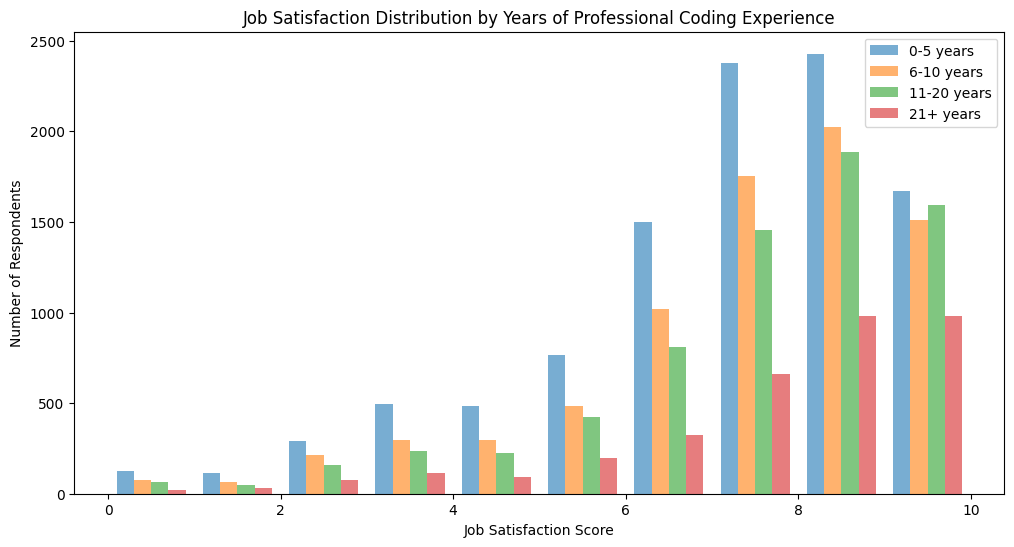

In [43]:
## Write your code here
# Load JobSat and YearsCodePro
query = """SELECT JobSat, YearsCodePro FROM main;"""
job_st_df = pd.read_sql_query(query, conn)

# Drop rows with missing values
job_st_df = job_st_df.dropna(subset=['JobSat', 'YearsCodePro'])

# Map YearsCodePro to numeric
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Convert numeric strings to float
def map_years(x):
    if x in years_mapping:
        return years_mapping[x]
    try:
        return float(x)
    except:
        return None

job_st_df['YearsCodePro_num'] = job_st_df['YearsCodePro'].apply(map_years)

# Drop rows that could not be converted
job_st_df = job_st_df.dropna(subset=['YearsCodePro_num'])

# Plot histogram of JobSat by YearsCodePro
plt.figure(figsize=(12,6))
plt.hist(
    [job_st_df[job_st_df['YearsCodePro_num'] <= 5]['JobSat'],
     job_st_df[(job_st_df['YearsCodePro_num'] > 5) & (job_st_df['YearsCodePro_num'] <= 10)]['JobSat'],
     job_st_df[(job_st_df['YearsCodePro_num'] > 10) & (job_st_df['YearsCodePro_num'] <= 20)]['JobSat'],
     job_st_df[job_st_df['YearsCodePro_num'] > 20]['JobSat']],
    bins=10, 
    label=['0-5 years','6-10 years','11-20 years','21+ years'],
    alpha=0.6
)

plt.title('Job Satisfaction Distribution by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.legend()
plt.show()


# print(f'Missing (Null) values count: {job_st_df['JobSat'].isna().sum()}\n')
# print(f'Not Null values count: {job_st_df['JobSat'].notnull().sum()}\n')
# print(f'Unique values count: {job_st_df['JobSat'].nunique()}\n')
# print(f'Unique values: {job_st_df['JobSat'].unique()}\n')

# print(f'Missing (Null) values count: {job_st_df['YearsCodePro'].isna().sum()}\n')
# print(f'Not Null values count: {job_st_df['YearsCodePro'].notnull().sum()}\n')
# print(f'Unique values count: {job_st_df['YearsCodePro'].nunique()}\n')
# print(f'Unique values: {job_st_df['YearsCodePro'].unique()}')

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [46]:
conn.close()
name = "Diyor"
print(f"Connection closed by {name};)")

Connection closed by Diyor;)


### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
